In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler

from transformers import BertTokenizer, TFBertModel
import tensorflow as tf
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.metrics import confusion_matrix, classification_report

import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopw = stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
df1 = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/article/articles.csv',encoding='latin1')
df1.head()

,Id,Heading,Article.Banner.Image,Outlets,Article.Description,Full_Article,Article_Type,Tonality
0,d6995462-5e87-453b-b64d-e9f1df6e94d2,"A Puzzling Maneuver, Then Freefall: NTSB Repor...",NaN,Essex Caller,<p>The helicopter that crashed in Southeast Al...,<p>The helicopter that crashed in Southeast Al...,Commercial,Negative
1,8b05e939-a89e-4548-b92b-013822e8ee7d,Bells Nexus Air Taxi Concept Rings Changes Fo...,NaN,Aviation Week Network,<p>A year after teasing the fledgling electric...,<p>A year after teasing the fledgling electric...,Commercial,Positive
2,69fcd400-bceb-4255-8277-619f2d68ac0b,Bell Helicopter Show Air Taxi Nexus,http://images.tmtpost.com/uploads/images/2019/...,TMTPost,<p>Bell released the full-size design of the v...,<p>Bell released the full-size design of the v...,Commercial,Positive
3,17943578-c11b-414b-b3f5-063d3a93157b,BELL DÉVOILE LA CONCEPTION INTÉGRALE DE SON TA...,http://www.fredzone.org/wp-content/uploads/201...,Fredzone,<p>Bell est une soci&eacute;t&eacute; am&eacut...,<p>Bell est une soci&eacute;t&eacute; am&eacut...,Commercial,Positive
4,f33c7b11-5f77-4a98-bb2e-d36689042aea,Les premiers retours dOlivier Ezratty,NaN,FrenchWeb,<p>It was still anecdotal to observe the explo...,<p>It was still anecdotal to observe the explo...,Commercial,Positive


In [6]:
df = df1[['Full_Article', 'Article_Type']]
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4305 entries, 0 to 4304
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Full_Article  4305 non-null   object
 1   Article_Type  4305 non-null   object
dtypes: object(2)
memory usage: 67.4+ KB


In [7]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4305 entries, 0 to 4304
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Full_Article  4305 non-null   object
 1   Article_Type  4305 non-null   object
dtypes: object(2)
memory usage: 67.4+ KB


# Text Cleaning

In [8]:
import re

def clean_text(text):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', text)
    clean_text = re.sub(r'[^a-zA-Z0-9\s]', '', cleantext)

    return clean_text.strip()

In [9]:
df['Full_Article'] = df['Full_Article'].apply(lambda x: clean_text(x))
df.head()

,Full_Article,Article_Type
0,The helicopter that crashed in Southeast Alask...,Commercial
1,A year after teasing the fledgling electric ve...,Commercial
2,Bell released the fullsize design of the verti...,Commercial
3,Bell est une socieacuteteacute ameacutericaine...,Commercial
4,It was still anecdotal to observe the explosio...,Commercial


In [10]:
df['Article_Type'].value_counts()

Article_Type
Commercial            2470
Military              1677
Executives              65
Others                  52
Support & Services      26
Financing                9
Training                 6
Name: count, dtype: int64

In [11]:
X = df.drop('Article_Type', axis=1)
y = df['Article_Type']

oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Article_Type'] = y_resampled


print(df_resampled['Article_Type'].value_counts())

Article_Type
Commercial            2470
Military              2470
Training              2470
Executives            2470
Others                2470
Financing             2470
Support & Services    2470
Name: count, dtype: int64


In [27]:
mapping = {
    0: 'Commercial',
    1: 'Executives',
    2: 'Financing',
    3: 'Military',
    4: 'Others',
    5: 'Support & Services',
    6: 'Training'
}


In [12]:
data_texts = df_resampled['Full_Article'].to_list()
data_labels = df_resampled['Article_Type'].to_list()

In [13]:
train_texts, test_texts, train_labels, test_labels = train_test_split(data_texts, data_labels, test_size = 0.2, random_state = 0 )

In [15]:
import numpy as np
from gensim.models import KeyedVectors

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

import gensim.downloader as api

word_vectors = api.load('word2vec-google-news-300')

# Load pre-trained Word2Vec embeddings
# word_vectors = KeyedVectors.load_word2vec_format('path_to_word2vec.bin', binary=True)

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [18]:
# Function to average Word2Vec embeddings for a sentence
def get_sentence_embeddings(data_texts, word_vectors):
    embeddings = []
    for text in data_texts:
        words = text.lower().split()
        vectors = [word_vectors[word] for word in words if word in word_vectors]
        if vectors:
            avg_vector = np.mean(vectors, axis=0)
        else:
            avg_vector = np.zeros(word_vectors.vector_size)
        embeddings.append(avg_vector)
    return np.array(embeddings)

# Convert texts to Word2Vec embeddings
embeddings = get_sentence_embeddings(data_texts, word_vectors)

# Split data into training and test sets
train_embeddings, test_embeddings, train_labels, test_labels = train_test_split(embeddings, data_labels, test_size=0.2, random_state=42)


In [31]:
# 1. RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(train_embeddings, train_labels)
predicted_labels_rf = clf_rf.predict(test_embeddings)

print("RandomForest Classifier Report:\n", classification_report(test_labels, predicted_labels_rf))

print("\nRandomForest Accuracy Score: ", accuracy_score(test_labels, predicted_labels_rf))

RandomForest Classifier Report:
                     precision    recall  f1-score   support

        Commercial       0.88      0.92      0.90       499
        Executives       1.00      1.00      1.00       475
         Financing       1.00      1.00      1.00       494
          Military       0.92      0.88      0.90       507
            Others       1.00      1.00      1.00       494
Support & Services       1.00      1.00      1.00       506
          Training       1.00      1.00      1.00       483

          accuracy                           0.97      3458
         macro avg       0.97      0.97      0.97      3458
      weighted avg       0.97      0.97      0.97      3458


RandomForest Accuracy Score:  0.9705031810294968


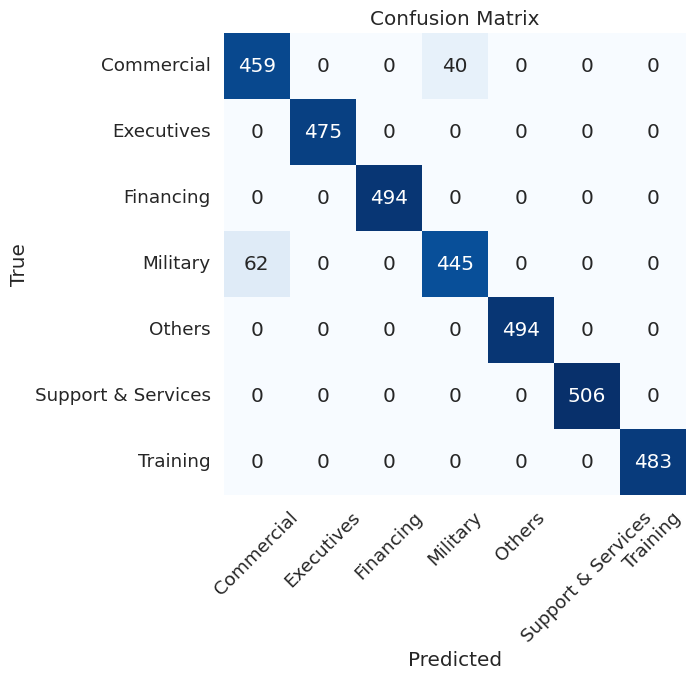

In [33]:
confusion = confusion_matrix(test_labels, predicted_labels_rf)


plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Add category labels
tick_labels = [mapping[i] for i in range(len(mapping))]
plt.xticks(ticks=np.arange(len(mapping))+0.5, labels=tick_labels, rotation=45)
plt.yticks(ticks=np.arange(len(mapping))+0.5, labels=tick_labels, rotation=0)

plt.show()


In [34]:
# 2. Support Vector Machine (SVM)
clf_svm = SVC(kernel='linear', random_state=42)
clf_svm.fit(train_embeddings, train_labels)
predicted_labels_svm = clf_svm.predict(test_embeddings)

print("\n 2.SVM Classification Report:\n", classification_report(test_labels, predicted_labels_svm))

print("SVM Accuracy Score: ", accuracy_score(test_labels, predicted_labels_svm))


 2.SVM Classification Report:
                     precision    recall  f1-score   support

        Commercial       0.83      0.80      0.82       499
        Executives       0.99      0.99      0.99       475
         Financing       1.00      1.00      1.00       494
          Military       0.88      0.85      0.87       507
            Others       0.91      0.98      0.95       494
Support & Services       0.98      1.00      0.99       506
          Training       1.00      1.00      1.00       483

          accuracy                           0.94      3458
         macro avg       0.94      0.94      0.94      3458
      weighted avg       0.94      0.94      0.94      3458

SVM Accuracy Score:  0.9441873915558127


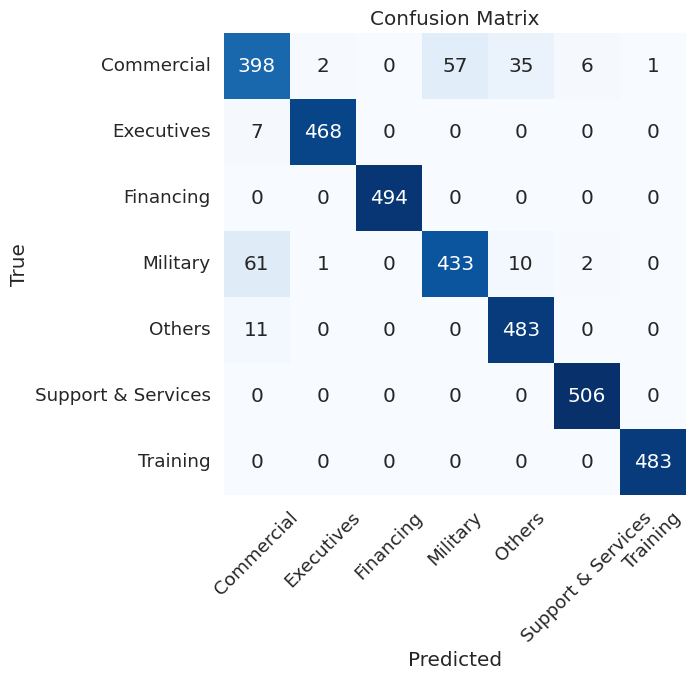

In [35]:
confusion = confusion_matrix(test_labels, predicted_labels_svm)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Add category labels
tick_labels = [mapping[i] for i in range(len(mapping))]
plt.xticks(ticks=np.arange(len(mapping))+0.5, labels=tick_labels, rotation=45)
plt.yticks(ticks=np.arange(len(mapping))+0.5, labels=tick_labels, rotation=0)

plt.show()